In [41]:
# QUIZ
# 
# The function backward_euler below currently implements 
# the Forward Euler Method. Modify it to implement the 
# Backward Euler Method. When you're done, set the step 
# size h to 5. and see what happens!

from udacityplots import *
import math
from math import sqrt
import numpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


In [75]:
h = 5.0 # days

In [76]:
transmission_coeff = tc = 5e-9 # 1 / day person
latency_time = lt =  1. # days
infectious_time = it = 5. # days

end_time = 60. # days
num_steps = int(end_time / h)

times = h * numpy.array(range(num_steps + 1))

In [77]:
# very long lambdas
# eh_lambda = lambda step: ((1/2)*lt*(e[step]*h**2*it*tc - h**2*i[step]*it*tc + h**2*it*s[step]*tc - h**2 - h*i[step]*it*lt*tc - h*it - h*lt - it*lt - sqrt(e[step]**2*h**4*it**2*tc**2 + 2*e[step]*h**4*i[step]*it**2*tc**2 + 2*e[step]*h**4*it**2*s[step]*tc**2 + 2*e[step]*h**4*it*tc + 2*e[step]*h**3*i[step]*it**2*lt*tc**2 + 2*e[step]*h**3*it**2*tc + 2*e[step]*h**3*it*lt*tc + 2*e[step]*h**2*it**2*lt*tc + h**4*i[step]**2*it**2*tc**2 + 2*h**4*i[step]*it**2*s[step]*tc**2 + 2*h**4*i[step]*it*tc + h**4*it**2*s[step]**2*tc**2 - 2*h**4*it*s[step]*tc + h**4 + 2*h**3*i[step]**2*it**2*lt*tc**2 + 2*h**3*i[step]*it**2*lt*s[step]*tc**2 + 2*h**3*i[step]*it**2*tc + 4*h**3*i[step]*it*lt*tc - 2*h**3*it**2*s[step]*tc - 2*h**3*it*lt*s[step]*tc + 2*h**3*it + 2*h**3*lt + h**2*i[step]**2*it**2*lt**2*tc**2 + 4*h**2*i[step]*it**2*lt*tc + 2*h**2*i[step]*it*lt**2*tc - 2*h**2*it**2*lt*s[step]*tc + h**2*it**2 + 4*h**2*it*lt + h**2*lt**2 + 2*h*i[step]*it**2*lt**2*tc + 2*h*it**2*lt + 2*h*it*lt**2 + it**2*lt**2))/(h**2*it*tc*(h + lt)))

In [78]:
# eh_lambda2 = lambda step: ((1/2)*lt*(e[step]*h**2*it*tc - h**2*i[step]*it*tc + h**2*it*s[step]*tc - h**2 - h*i[step]*it*lt*tc - h*it - h*lt - it*lt + sqrt(e[step]**2*h**4*it**2*tc**2 + 2*e[step]*h**4*i[step]*it**2*tc**2 + 2*e[step]*h**4*it**2*s[step]*tc**2 + 2*e[step]*h**4*it*tc + 2*e[step]*h**3*i[step]*it**2*lt*tc**2 + 2*e[step]*h**3*it**2*tc + 2*e[step]*h**3*it*lt*tc + 2*e[step]*h**2*it**2*lt*tc + h**4*i[step]**2*it**2*tc**2 + 2*h**4*i[step]*it**2*s[step]*tc**2 + 2*h**4*i[step]*it*tc + h**4*it**2*s[step]**2*tc**2 - 2*h**4*it*s[step]*tc + h**4 + 2*h**3*i[step]**2*it**2*lt*tc**2 + 2*h**3*i[step]*it**2*lt*s[step]*tc**2 + 2*h**3*i[step]*it**2*tc + 4*h**3*i[step]*it*lt*tc - 2*h**3*it**2*s[step]*tc - 2*h**3*it*lt*s[step]*tc + 2*h**3*it + 2*h**3*lt + h**2*i[step]**2*it**2*lt**2*tc**2 + 4*h**2*i[step]*it**2*lt*tc + 2*h**2*i[step]*it*lt**2*tc - 2*h**2*it**2*lt*s[step]*tc + h**2*it**2 + 4*h**2*it*lt + h**2*lt**2 + 2*h*i[step]*it**2*lt**2*tc + 2*h*it**2*lt + 2*h*it*lt**2 + it**2*lt**2))/(h**2*it*tc*(h + lt)))

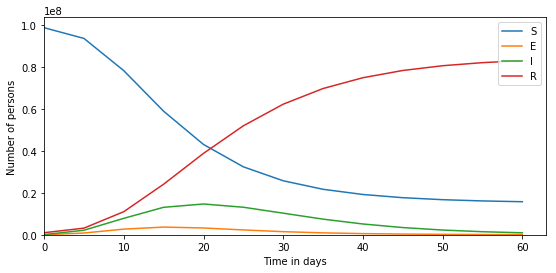

In [86]:
def backward_euler():

    s = numpy.zeros(num_steps + 1)
    e = numpy.zeros(num_steps + 1)
    i = numpy.zeros(num_steps + 1)
    r = numpy.zeros(num_steps + 1)

    s[0] = 1e8 - 1e6 - 1e5
    e[0] = 0.
    i[0] = 1e5
    r[0] = 1e6

    for step in range(num_steps):
        # Forward Euler Method code
        s2e = h * transmission_coeff * s[step] * i[step]
        e2i = h / latency_time * e[step]
        i2r = h / infectious_time * i[step]

        ##### Tip: Start going from implicit to explict by treating one equation at a time and checking if the result is still ok. 
        #####      Start with the equation for r, then move to s, i, and e. Once you're done, change the step size h to 5.

        #######SPOILER ALERT: This is the result for e[step + 1] from the Backward Euler method
        # You may simply remove the comment signs to use it.
        # Given enough practice in algebra, however, you may want to spend half an hour and derive this yourself.
        # In essence, the derivation boils down to solving a quadratic equation.
        # Start by expressing e[step + 1] + s[step + 1] with the help of e[step] and s[step].    
        p = ((1.0 + h / infectious_time) / (h * transmission_coeff) + i[step]) / (h / latency_time) - (s[step] + e[step]) / (1.0 + h / latency_time) 
        q = -((1.0 + h / infectious_time) / (h * transmission_coeff) * e[step] + (s[step] + e[step]) * i[step]) / ((1.0 + h / latency_time) * (h / latency_time))
        e[step + 1] = -0.5 * p + math.sqrt(0.25 * p * p - q)
        #####################

        ##### REPLACE THE CODE BELOW
        
        # e[step + 1] = e[step] + s2e - e2i
        
        
        a = (i[step] + h / latency_time * e[step + 1]) / (1.0 + h / infectious_time)
        b = it*(e[step+1]*h + i[step]*lt)/(lt*(h + it))
        assert(round(a,4) == round(b,4))
        
        # BOTH FORMULAS ARE THE SAME (proof in the 3 lines above)
        
        # i[step + 1] = i[step] + e2i - i2r
        # i[step+1] = (i[step] + h / latency_time * e[step + 1]) / (1.0 + h / infectious_time)
        i[step+1] = it*(e[step+1]*h + i[step]*lt)/(lt*(h + it))
        
        
        #s[step + 1] = s[step] - s2e
        #a = s[step] * (1.0 / (1.0+transmission_coeff*h*i[step+1]))
        #b = s[step] / (1.0 + h * transmission_coeff * i[step+1])
        #assert(round(a,4) == round(b,4))

        s[step+1] = s[step] * (1.0 / (1.0+transmission_coeff*h*i[step+1]))
        #s[step+1] = s[step] / (1.0 + h * transmission_coeff * i[step+1])
        
        
        # r[step + 1] = (1 / (1+h)) * r[step] + i2r
        #a = r[step] + h / infectious_time * i[step+1]
        #b = r[step] + h*((1/infectious_time)*i[step+1])
        #assert(round(a,4) == round(b,4))
        
        r[step+1] = r[step] + h*((1.0/infectious_time)*i[step+1])
        #r[step+1] = r[step] + h / infectious_time * i[step+1]
        
        ##### REPLACE THE CODE ABOVE

    return s, e, i, r

s, e, i, r = backward_euler()

@show_plot
def plot_me():
    s_plot = matplotlib.pyplot.plot(times, s, label = 'S')
    e_plot = matplotlib.pyplot.plot(times, e, label = 'E')
    i_plot = matplotlib.pyplot.plot(times, i, label = 'I')
    r_plot = matplotlib.pyplot.plot(times, r, label = 'R')
    matplotlib.pyplot.legend(('S', 'E', 'I', 'R'), loc = 'upper right')
    
    axes = matplotlib.pyplot.gca()
    axes.set_xlabel('Time in days')
    axes.set_ylabel('Number of persons')
    matplotlib.pyplot.xlim(left = 0.)
    matplotlib.pyplot.ylim(bottom = 0.)

plot_me()